<a href="https://colab.research.google.com/github/MatheusOrange211/Bootcamp-Alura/blob/main/SERIES_TEMPORAIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📙 **MÓDULO 4 - ANÁLISE DE SÉRIES TEMPORAIS USANDO O DATASUS**
---

#importação dos dados e bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import datetime
import plotly.express as px
# sns.set() #transformar o plot no formato de seaborn

In [2]:
url = "https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/tuberculose_ano_mes_diagnostico.csv"

In [3]:
! pip install --upgrade statsmodels

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.12.1)


#O que são séries temporais?

Em estatística, econometria, matemática aplicada e processamento de sinais, uma série temporal é uma coleção de observações feitas sequencialmente ao longo do tempo.

In [4]:
dados_temporais = pd.read_csv(url,encoding="ISO-8859-1",sep=";",skiprows=3,skipfooter=17,engine='python')
dados_temporais.drop("Total",axis=1,inplace=True)
dados_temporais

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176


### 📗 AULA 1 - DESAFIO 01 :Transformar os dados em uma série temporal Ano-Mês



A ideia é criar, a partir do dataset original um novo dataframe no estilo ano-mês.

````
ano-mes | valor
2015.1  | 4895
2015.2  | 8952
2015.3  | 2435
2015.4  | 9390
````

Para isso, primeiro copiamos o dataframe diretamente da url, removemos o campo de total que não será necessário e assim temos os dados originais

In [5]:
dados_temporais_desafio = pd.read_csv(url,encoding="ISO-8859-1",sep=";",skiprows=3,skipfooter=17,engine='python')
dados_temporais_desafio = dados_temporais_desafio.drop("Total",axis=1)
dados_temporais_desafio = dados_temporais_desafio.set_index("Ano Diagnóstico")
dados_temporais_desafio.head()

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
Ano Diagnóstico,,,,,,,,,,,,
2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541


Foi criado então duas variáveis com **list comprehension**. Na `ano_mes` concatenamos os anos com os meses, formando `2007.1` (preferi transformar os nomes dos meses em números mesmo, por isso o uso do `range`no laço `for` *j*).

<br>
Crio então, uma segunda list comprehension que comportará nossa matriz de valores. Os dois laços `for`criarão a seguinte combinação:

onde temos que :
* i para as linhas;
* j para as colunas

Para sabermos quantas linhas temos, basta dar um `len(dados_temporais_desafio.values)` . Para saber as colunas, pegamos a primeira linha, e lemos seu comprimento:
`len(dados_temporais_desafio.values[0])`. Assim no laço temos:

```
dados_temporais_desafio.value[i][j]
```




In [6]:
ano_mes = [ f"{i}.{j}"for i in dados_temporais_desafio.index
                      for j in range(1,len(dados_temporais_desafio.columns)+1)]

valores =  [dados_temporais_desafio.values[i][j] for i in range(0,len(dados_temporais_desafio.values))
                                                 for j in range(0,len(dados_temporais_desafio.values[0]))]



`ano_mes` e `valores` tem os mesmo valores de comprimento. Logo, deu tudo certo, e cada valor está no seu respectivo ano-mês dado a forma como construimos. Agora basta criar duas colunas em novo dataframe e adiciona nossas listas.

In [7]:
print(len(ano_mes),len(valores))

228 228


In [8]:
dataframe_solucao = pd.DataFrame([])

dataframe_solucao["ano_mes"] = ano_mes
dataframe_solucao["ano_mes_valores"] = valores

In [9]:
dataframe_solucao

,ano_mes,ano_mes_valores
0,2001.1,8088
1,2001.2,6542
2,2001.3,8095
3,2001.4,7305
4,2001.5,7656
...,...,...
223,2019.8,8239
224,2019.9,8143
225,2019.10,8592
226,2019.11,7615


## 📒 AULA 1 - SOLUÇÃO 01 :Transformar os dados em uma série temporal Ano-Mês

uma outra forma de também fazer


In [10]:
dados_st_solucao = dados_temporais.melt(id_vars="Ano Diagnóstico",value_name="Casos",var_name="Mês")
dados_st_solucao["Data"] = dados_st_solucao["Ano Diagnóstico"].apply(str) + "-"+ dados_st_solucao["Mês"]
dados_st_solucao

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


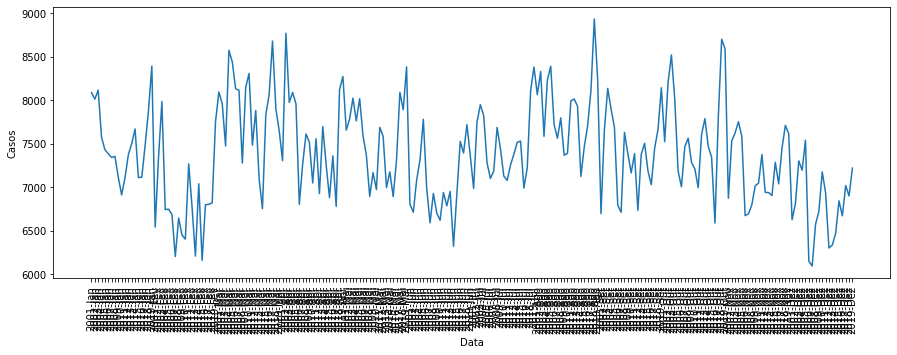

In [11]:
plt.figure(figsize=(15,5))
sns.lineplot(data=dados_st_solucao,x="Data",y="Casos",)
plt.xticks(rotation=90)
plt.show()

## 📗 AULA 1 - DESAFIO 02 :Converter a data (String) em Datetime

Temos que transformar esta coluna Data

In [12]:
dados_st_solucao

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


crio um dicionário com os valores que tenho e o que eu quero por no lugar

In [13]:
meses = {"Jan":"1","Fev":"2","Mar":"3","Abr":"4","Mai":"5","Jun":"6",
         "Jul":"7","Ago":"8","Set":"9",
         "Out":"10","Nov":"11","Dez":"12"}

com uma lista vazia, passaremos os resultados formatados. No laço for que percorre os valores da coluna data, ire primeiro, para cada valor, dar um replace em "-" para no lugar por um espaço em branco (" "). Com a variável x, armazenarei um split de cada valor, pegando então o segundo valor da lista que é criada quando passamos um split (valor.split()[1]====> ["2020","Jan"]). Passo outro replace que substitui o que tem na posição 1 da variável valor e no lugar, com a ajuda do dicionário que recebe a nossa chave, o novo valor que subtituirá o nome do mês pelo número (no caso em tipo string). Adicionamos no final a concatenação da primeira palavra de nosso split (o ano, que não é modificado) com um traço mais o nosso número que substitui o nome do mês.

In [14]:
valor_formatado = []
for i  in dados_st_solucao["Data"]:
  valor = i.replace("-", " ")
  x = valor.split()[1].replace(valor.split()[1],meses[valor.split()[1]])
  valor_formatado.append(str(valor.split()[0] +"-" +  x))

Atribuio na coluna data, a nova formatação.

In [15]:
dados_st_solucao["Data"] = valor_formatado
dados_st_solucao["Data"]

0       2001-1
1       2002-1
2       2003-1
3       2004-1
4       2005-1
        ...   
223    2015-12
224    2016-12
225    2017-12
226    2018-12
227    2019-12
Name: Data, Length: 228, dtype: object

com o datetime, transformaremos o tipo e o formato de posição, pondo o mês na frente e o ano atrás.

In [16]:
dados_st_solucao["Data"] = pd.to_datetime(dados_st_solucao["Data"])
dados_st_solucao["Data"].dt.strftime('%Y-%m')

0      2001-01
1      2002-01
2      2003-01
3      2004-01
4      2005-01
        ...   
223    2015-12
224    2016-12
225    2017-12
226    2018-12
227    2019-12
Name: Data, Length: 228, dtype: object

ficando então desta forma o Dtype == datetime64[ns]

In [17]:
dados_st_solucao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ano Diagnóstico  228 non-null    int64         
 1   Mês              228 non-null    object        
 2   Casos            228 non-null    int64         
 3   Data             228 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.2+ KB


organizo no fim as datas para ter certeza que fica tudo certinho

In [18]:
dados_st_solucao.sort_values(by="Data",inplace=True)

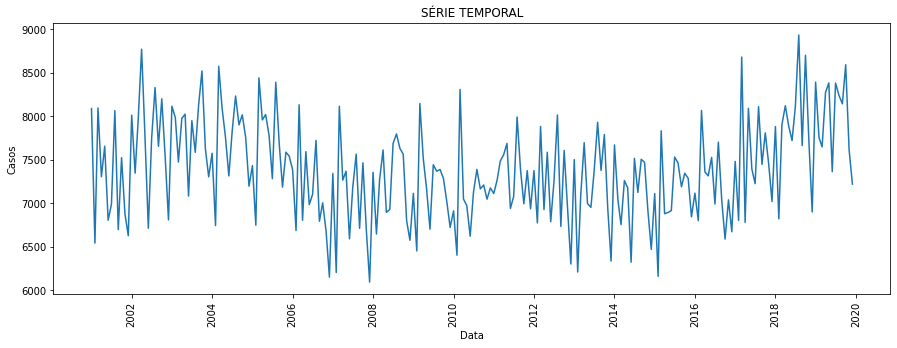

In [19]:
plt.figure(figsize=(15,5))
sns.lineplot(data=dados_st_solucao,x="Data",y="Casos",)
plt.xticks(rotation=90)
plt.title("SÉRIE TEMPORAL")
plt.show()

como fica nosso dataset final

In [20]:
dados_st_solucao.head()

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-01-01
19,2001,Fev,6542,2001-02-01
38,2001,Mar,8095,2001-03-01
57,2001,Abr,7305,2001-04-01
76,2001,Mai,7656,2001-05-01


#Manipulando dados em formato de Data


Passaremos a ter como dataframe usado ao resto das aulas este:

In [21]:
dados_st = dados_st_solucao[["Data","Casos"]]
dados_st

,Data,Casos
0,2001-01-01,8088
19,2001-02-01,6542
38,2001-03-01,8095
57,2001-04-01,7305
76,2001-05-01,7656
...,...,...
151,2019-08-01,8239
170,2019-09-01,8143
189,2019-10-01,8592
208,2019-11-01,7615


### 📒 AULA 2 - SOLUÇÃO 02 : Converter a data (string) em Datetime

Para resolver este problema, temos que apenas modificar os valores "Jan", "Fev","Mar","Abr".... para o padrão em inglês: "Feb", "Mar","Apr".... pois o próprio
```
pd.to_datetime(dados_temporais["Data"])
```
Já converteria

Criamos um dicionário então com os valores do mês em português e em inglês. Depois selecionamos o nosso dataframe, na coluna `Mês` e aplicamos um map, do qual passamos dentro dele o dicionário com os valores em portugues-ingles:
```
dados_temporais["Mês"].map(dicionario_meses_convertidos)
```
No fim, só concatenar de novo os anos com mês e aplicar o datetime novamente que o proprio se encarregará de converter meses para números.

### 📗 AULA 2 - DESAFIO 03 : Faça a mesma transformação realizada em aula nas datas para a base de dados de Hanseníase.

In [22]:
url_hanseniase = "https://raw.githubusercontent.com/MatheusOrange211/Bootcamp-Alura/main/dados/A180654189_28_143_208.csv"
dados_hanseniase = pd.read_csv(url_hanseniase,sep=";",encoding="ISO-8859-1",engine ="python",skiprows=3,skipfooter=11)
dados_hanseniase.drop("Total",axis=1,inplace=True)
dados_hanseniase

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,<1975,28,8,12,14,14,17,17,14,12,23,21,21
1,1975,-,1,-,-,-,-,-,-,-,-,-,1
2,1976,-,-,-,2,1,2,-,-,2,-,1,-
3,1977,2,-,-,1,-,-,-,-,-,1,1,-
4,1978,-,-,-,-,-,2,1,2,-,1,-,-
5,1979,2,1,1,-,-,1,3,3,2,3,-,-
6,1980,2,-,3,2,-,1,-,1,2,1,2,-
7,1981,2,2,1,1,1,2,-,-,1,3,-,-
8,1982,2,-,-,1,2,1,-,-,-,1,-,1
9,1983,4,-,4,-,1,-,-,2,2,1,1,2


Agora, vamos formatar para o formato de séries temporais com o melt, passando nosso dicionário com os meses (mesmo os repetidos para não gerar problema)

In [23]:
meses_convertidos = {"Jan":"Jan","Fev":"Feb","Mar":"Mar","Abr":"Apr",
                     "Mai":"May","Jun":"Jun","Jul":"Jul","Ago":"Aug",
                     "Set":"Sep","Out":"Oct","Nov":"Nov","Dez":"Dec"}
dados_hanseniase = dados_hanseniase.melt(id_vars="Ano Diagnóstico",value_name="Casos",var_name="Mês")
dados_hanseniase["Mês"] = dados_hanseniase["Mês"].map(meses_convertidos)
dados_hanseniase["Data"] = dados_hanseniase["Ano Diagnóstico"] +"-"+ dados_hanseniase["Mês"]
dados_hanseniase

,Ano Diagnóstico,Mês,Casos,Data
0,<1975,Jan,28,<1975-Jan
1,1975,Jan,-,1975-Jan
2,1976,Jan,-,1976-Jan
3,1977,Jan,2,1977-Jan
4,1978,Jan,-,1978-Jan
...,...,...,...,...
547,2015,Dec,2412,2015-Dec
548,2016,Dec,2213,2016-Dec
549,2017,Dec,2448,2017-Dec
550,2018,Dec,2268,2018-Dec


Na primeira linha temos o `<1975` para anos anteriores a 1975. Para evitar erros, vou remover ele. Primeiramente, vou renomear as colunas para evitar erros na query

In [24]:
dados_hanseniase.rename(columns={"Ano Diagnóstico":"Ano_Diagnostico","Mês":"Mês","Casos":"Casos","Data":"Data"},inplace=True)
dados_hanseniase = dados_hanseniase.query("Ano_Diagnostico != '<1975'")
dados_hanseniase.head()

,Ano_Diagnostico,Mês,Casos,Data
1,1975,Jan,-,1975-Jan
2,1976,Jan,-,1976-Jan
3,1977,Jan,2,1977-Jan
4,1978,Jan,-,1978-Jan
5,1979,Jan,2,1979-Jan


vamos tentar converter

In [25]:
dados_hanseniase["Data"] = pd.to_datetime(dados_hanseniase["Data"])
dados_hanseniase["Data"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1     1975-01-01
2     1976-01-01
3     1977-01-01
4     1978-01-01
5     1979-01-01
         ...    
547   2015-12-01
548   2016-12-01
549   2017-12-01
550   2018-12-01
551   2019-12-01
Name: Data, Length: 540, dtype: datetime64[ns]

Convertemos, e agora reduzimos nosso dataframe e ordenamos direitinho as datas. Vamos tentar plotar?

In [26]:
dados_hanseniase = dados_hanseniase[["Data","Casos"]]
dados_hanseniase = dados_hanseniase.sort_values(by='Data')
dados_hanseniase.head()

,Data,Casos
1,1975-01-01,-
47,1975-02-01,1
93,1975-03-01,-
139,1975-04-01,-
185,1975-05-01,-


Os valores faltantes, vamos por um zero no lugar dos traços e principalmente, converter a coluna `Casos`para o tipo inteiro, pois ele estava como um object, e quando plotei da primeira vez, os dados ficaram todos borrados um sobre o outro porque não estavam no formato certo.

In [27]:
dados_hanseniase = dados_hanseniase.replace('-',0)
dados_hanseniase["Casos"] = dados_hanseniase["Casos"].astype(int)
dados_hanseniase.head()

,Data,Casos
1,1975-01-01,0
47,1975-02-01,1
93,1975-03-01,0
139,1975-04-01,0
185,1975-05-01,0


In [28]:
dados_hanseniase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 1 to 551
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    540 non-null    datetime64[ns]
 1   Casos   540 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 12.7 KB


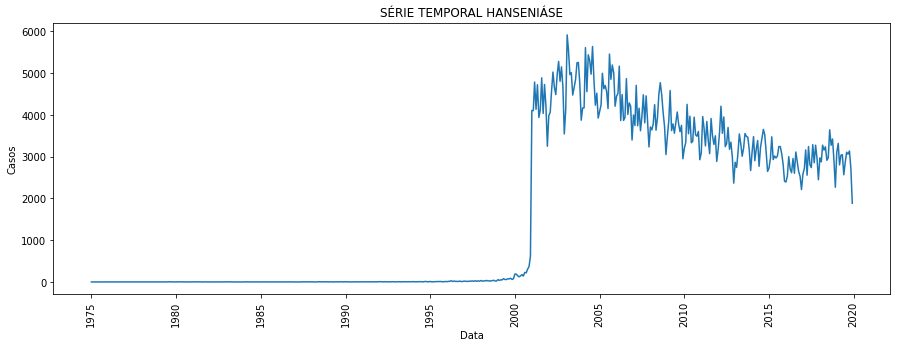

In [29]:
plt.figure(figsize=(15,5))
sns.lineplot(data=dados_hanseniase,x="Data",y="Casos",)
plt.xticks(rotation=90)
plt.title("SÉRIE TEMPORAL HANSENIÁSE")
plt.show()

### 📗 AULA 2 - DESAFIO 04 : Configurar o gráfico de número de casos para deixá-lo mais elegante, analisar junto com um gráfico dos dados de hanseníase e compartilhar no discord suas hipóteses.

Abaixo temos um exemplo com plotly e toda a sua interatividade


In [30]:
fig = px.line(data_frame=dados_hanseniase,x="Data",y="Casos",title="Série Temporal Hanseniese")
fig.show()

#Tendências e Médias Móveis

aplicamos um método chamado rolling() que nos permite passar uma janela de tempo que desejamos para realizar algum calculo. Como o exemplo abaixo, quero um janela do espaço de 3 meses para calcular a média móvel.

In [31]:
dados_st["Media_Movel_3_Meses"] = dados_st["Casos"].rolling(3).mean()

#Para o aviso de SettingWithCopyWarning, leia isso
#https://paulovasconcellos.com.br/o-que-%C3%A9-a-value-is-trying-to-be-set-on-a-copy-of-a-slice-from-a-dataframe-e85f744d8be1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



* Conseguimos realizar a média móvel
* Vamos arrumar o index rapindinho pra ele ficar organizado

In [32]:
dados_st.reset_index(drop=True,inplace=True)
dados_st.head()

,Data,Casos,Media_Movel_3_Meses
0,2001-01-01,8088,NaN
1,2001-02-01,6542,NaN
2,2001-03-01,8095,7575.000000
3,2001-04-01,7305,7314.000000
4,2001-05-01,7656,7685.333333


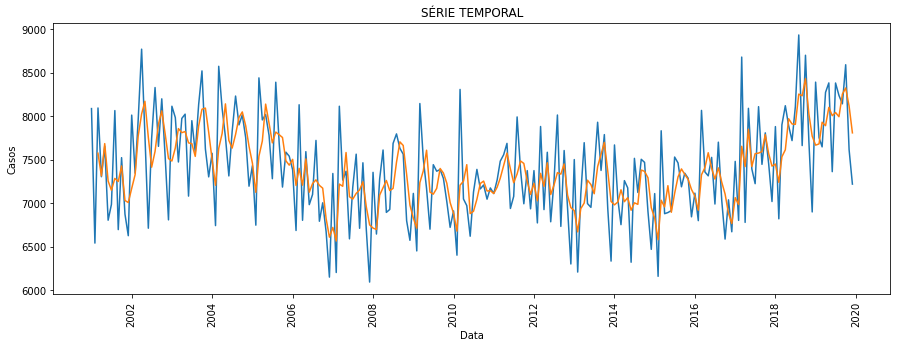

In [33]:
plt.figure(figsize=(15,5))
sns.lineplot(data=dados_st,x="Data",y="Casos")
sns.lineplot(data=dados_st,x="Data",y="Media_Movel_3_Meses")
plt.xticks(rotation=90)
plt.title("SÉRIE TEMPORAL")
plt.show()

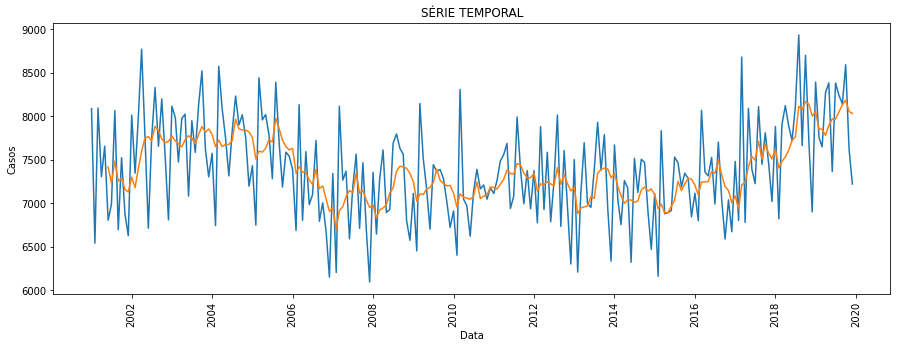

In [34]:
dados_st["Media_Movel_6_Meses"] = dados_st["Casos"].rolling(6).mean()
plt.figure(figsize=(15,5))
sns.lineplot(data=dados_st,x="Data",y="Casos")
sns.lineplot(data=dados_st,x="Data",y="Media_Movel_6_Meses")
plt.xticks(rotation=90)
plt.title("SÉRIE TEMPORAL")
plt.show()

Temos ainda outra opção que é a **Média Móvel Centrada**.  Vejamos ela então:

>É utilizada em casos onde há sazonalidade, que são variações que ocorrem para cima
ou para baixo em intervalos regulares, existindo uma razão para a ocorrência e repetições das
variações. Consiste em obter o índice de sazonalidade, que é o valor aplicado sobre a média
ou a tendência que se desvia dos valores médios da série, expressa em quantidade ou
porcentagem, como por exemplo, se o índice de sazonalidade de demanda por cervejas em
janeiro é de 1,30 significa que a demanda de cervejas nesse mês é 30% maior que a média


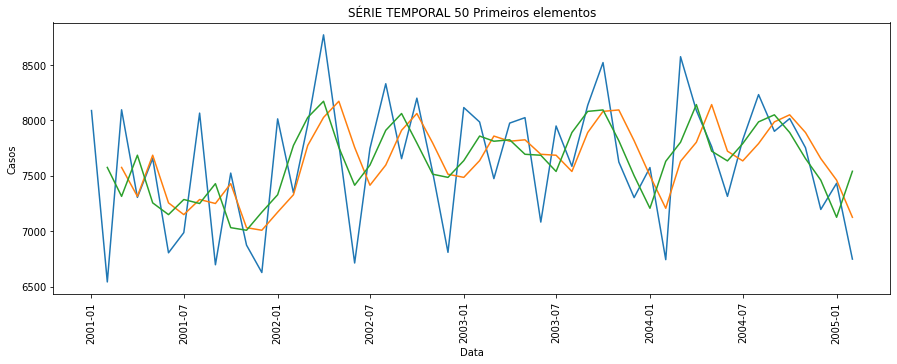

In [35]:
dados_st["Media_Movel_3_Meses_Centrada"] = dados_st["Casos"].rolling(3,center=True).mean()
plt.figure(figsize=(15,5))
sns.lineplot(data=dados_st[:50],x="Data",y="Casos")
sns.lineplot(data=dados_st[:50],x="Data",y="Media_Movel_3_Meses")
sns.lineplot(data=dados_st[:50],x="Data",y="Media_Movel_3_Meses_Centrada")
plt.xticks(rotation=90)
plt.title("SÉRIE TEMPORAL 50 Primeiros elementos")
plt.show()

### 📗 AULA 3 - DESAFIO 05 :  Analisar outras janelas de médias móveis, realizar a análise dessas janelas e compartilhar suas conclusões no Discord. Refletir sobre os impactos de uma suavização com janelas muito grandes.

In [36]:
def media_movel_hanseniase(dataset: pd.DataFrame,tempo:int,centrada:bool = True,
                           inicio:int = 0):
  dataset[f"Media_Movel_{str(tempo)}_Meses"] = dataset["Casos"]\
                                              .rolling(tempo).mean()
                                              
  dataset[f"Media_Movel_{str(tempo)}_Meses_Centrada"] = dataset["Casos"]\
                                              .rolling(tempo,center=centrada).mean()
  plt.figure(figsize=(15,5))
  sns.lineplot(data=dataset[inicio:540],x="Data",y="Casos")
  sns.lineplot(data=dataset[inicio:540],x="Data",y=f"Media_Movel_{str(tempo)}_Meses")
  sns.lineplot(data=dataset[inicio:540],x="Data",y=f"Media_Movel_{str(tempo)}_Meses_Centrada")
  plt.xticks(rotation=90)
  plt.title("SÉRIE TEMPORAL")
  plt.legend(["Casos","Média Móvel","Média Móvel Centrada"])
  plt.show()

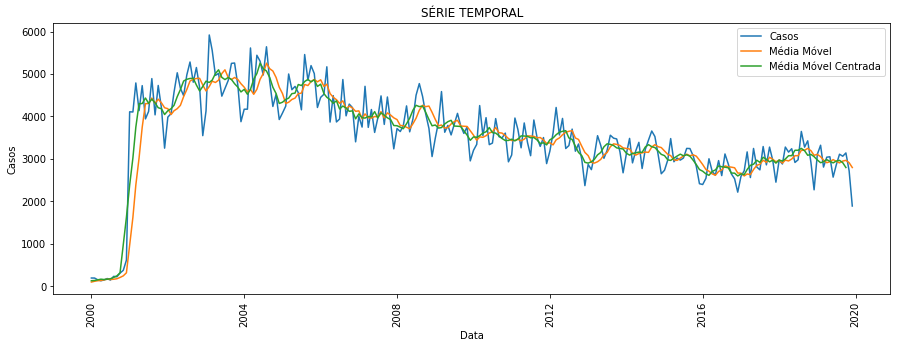

In [37]:
media_movel_hanseniase(dados_hanseniase,6,inicio=300)

Hanseniase nos últimos 21 anos. Temos alguns resultados para uma média móvel de 6 meses.

### 📗 AULA 3 - DESAFIO 06 : Pensar em como realizar sua primeira previsão usando as médias ou qualquer outra abordagem do seu interesse.

Para prever os casos de hanseniase por exemplo, preciso conhecer outras variáveis como tendência  e sazonalidade por exemplo. A única coisa que sabemos até o momento é o tempo. [link para leitura](https://towardsdatascience.com/analyzing-time-series-data-in-pandas-be3887fdd621)

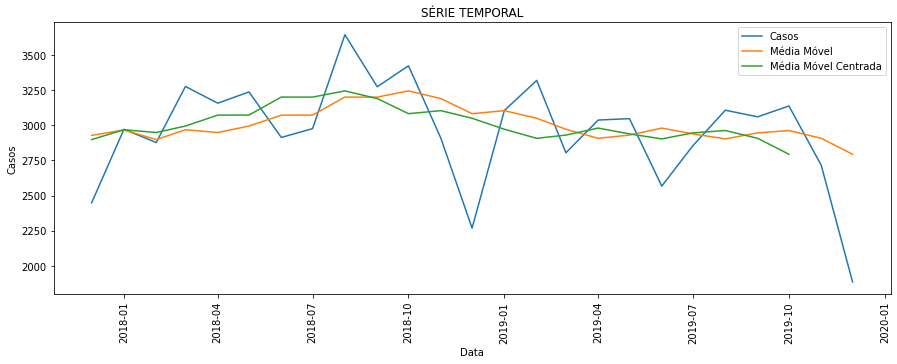

In [38]:
media_movel_hanseniase(dados_hanseniase,6,inicio=515)

In [39]:
 dados_hanseniase_teste = dados_hanseniase[["Data","Casos"]]
 dados_hanseniase_teste

,Data,Casos
1,1975-01-01,0
47,1975-02-01,1
93,1975-03-01,0
139,1975-04-01,0
185,1975-05-01,0
...,...,...
367,2019-08-01,3107
413,2019-09-01,3060
459,2019-10-01,3137
505,2019-11-01,2715


Para uma melhor performance, irei trabalhar apenas com os valores acima de 2000

In [40]:
dados_hanseniase_teste = dados_hanseniase_teste.query("Data >= 2015")

Temos então que: 
* **Tendência**:  Isso se refere ao movimento de uma série para valores relativamente maiores ou mais baixos durante um longo período de tempo. Por exemplo, quando a Análise da Série Time mostra um padrão que é para cima, chamamos de Tendência de Uptrend, e quando o padrão está para baixo, chamamos de tendência down, e se não houve tendência alguma, chamamos de tendência horizontal ou estacionária. Uma coisa chave a notar é que a tendência geralmente acontece por algum tempo e depois desaparece.

* **Sazonalidade**:  Isso se refere a um padrão repetitivo dentro de um período de tempo fixo. Embora esses padrões também possam oscilar para cima ou para baixo, no entanto, isso é bem diferente do de uma tendência porque a tendência acontece por um período de tempo e depois desaparece. No entanto, a sazonalidade continua acontecendo dentro de um período de tempo fixo. Por exemplo, quando é Natal, você descobre que mais doces e chocolates são vendidos e isso continua acontecendo todos os anos.

* **Irregularidade**: Isso também é chamado de ruído. A irregularidade acontece por uma curta duração e não está esgotando. Um exemplo muito bom é o caso do Ebola. Durante esse período, houve uma enorme demanda por desinfetantes para as mãos que aconteceu de forma errática/sistematicamente de uma maneira que ninguém poderia prever, portanto, não se poderia dizer quanto número de vendas poderia ter sido feito ou dizer da próxima vez que haverá outro surto.

* **Cíclico**: É quando uma série está se repetindo para cima e para baixo. Normalmente não tem um padrão fixo. Poderia acontecer em seis meses, então dois anos depois, depois 4 anos, depois 1 ano depois. Esses tipos de padrões são muito mais difíceis de prever.

vamos por a coluna data para ser o index

In [41]:
dados_hanseniase_teste.set_index("Data",inplace=True)

Lembrando que temos isso visualmente:

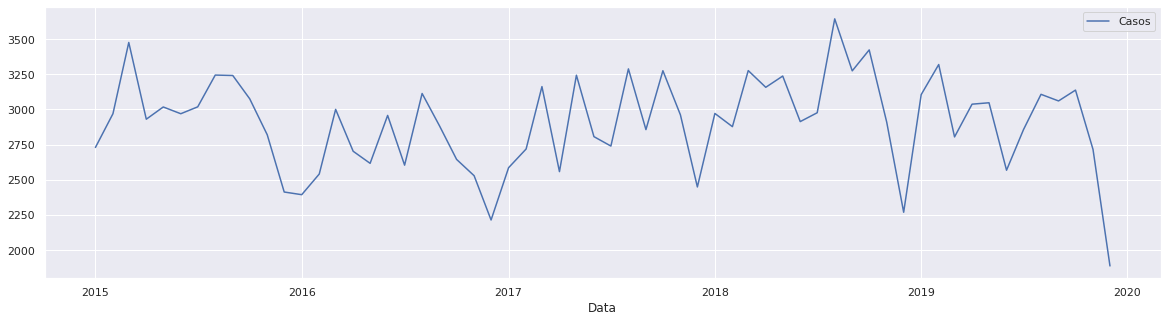

In [42]:
plt.figure(figsize=(20,5))
ax = sns.set()
ax = sns.lineplot(data=dados_hanseniase_teste)
plt.show()

  Aplica-se um modelo multiplicativo. O [link](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) explica como o statsmodels realiza as contas

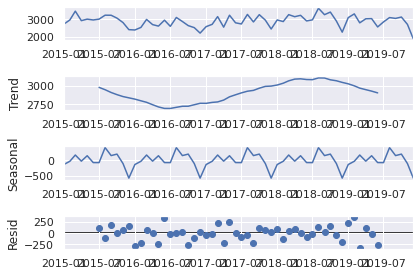

In [43]:
import statsmodels.api as sm
decomposicao = sm.tsa.seasonal_decompose(dados_hanseniase_teste,model='additive')
fig = decomposicao.plot()

Agora vamos traçar a tendência junto com o nosso plot inicial.

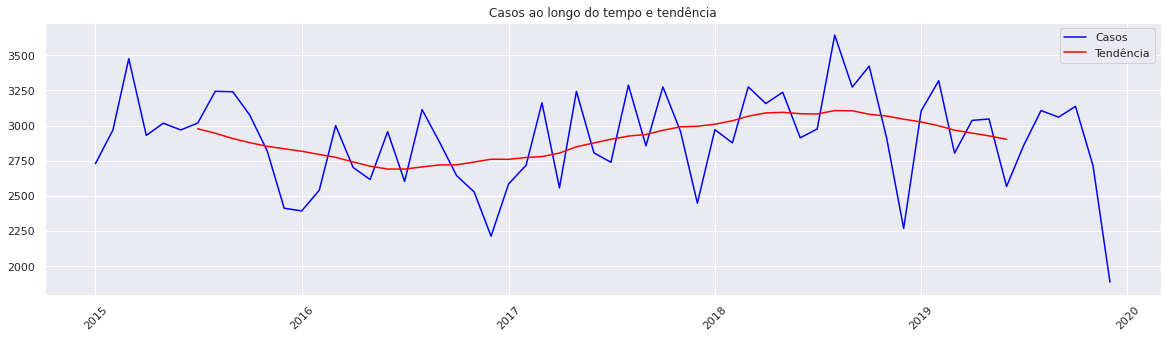

In [44]:
fig,ax = plt.subplots(figsize=(20,5))

ano = mdates.YearLocator(month=1)
mes =mdates.MonthLocator(interval=3)
ano_formato = mdates.DateFormatter("%Y")
mes_formato = mdates.DateFormatter("%Y")

ax.xaxis.set_minor_locator(mes)
ax.xaxis.set_major_locator(ano)
ax.xaxis.set_major_formatter(ano_formato)

plt.plot(dados_hanseniase_teste,color="blue")
plt.plot(decomposicao.trend.index,decomposicao.trend,color="red")

plt.xticks(rotation=45)
plt.title("Casos ao longo do tempo e tendência")
plt.legend(["Casos","Tendência"])
plt.show()

Temos então a tendência, em vermelho, e os casos, de azul, ao longo do tmepo. Ao que parece, a tendência veio tendo quedas significantes, de  quase 5000 casos, depois, ficando abaixo de 3000 entre 2016 e 2017 e logo depois ficando um pouquinho acima novamente.

Vamos tentar fazer uma pequena previsão com o modelo de Média Móvel Integrada Sazonal (SARIMA)

O método Da Média Móvel Integrada Integrada (SARIMA) sazonal modela o próximo passo na sequência como função linear das observações, erros, observações sazonais diferentes e erros sazonais em etapas anteriores.

Combina o modelo ARIMA com a capacidade de realizar a mesma autoregressão, diferenciamento e modelagem média móvel no nível sazonal.

A notação para o modelo envolve especificar o pedido para os modelos AR(p), I(d) e MA(q) como parâmetros para uma função ARIMA e parâmetros AR(P), I(D), MA(Q) e m no nível sazonal, por exemplo, SARIMA(p, d, q)(P, D, Q)m onde "m" é o número de etapas de tempo em cada estação (período sazonal). Um modelo SARIMA pode ser usado para desenvolver modelos AR, MA, ARMA e ARIMA.

O método é adequado para
 séries temporizais univariadas com componentes de tendência e/ou sazonais.

Função de autocorrelação (ACF)

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf


ACF é de suma importância pois é com ela que iremos por os valores em `order `  no nosso modelo SARIMAX

Vamos ver no gráfico

In [46]:
acf_model = sm.tsa.stattools.acf(dados_hanseniase_teste,nlags=2,fft=False)
acf_model

array([1.        , 0.2559078 , 0.05470709])

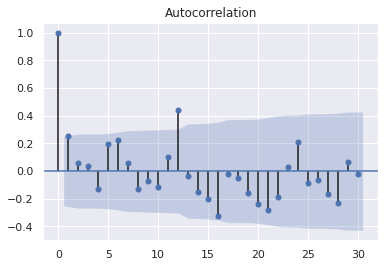

In [47]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dados_hanseniase_teste,lags=30)
plt.show()

Função de Autocorrelação Parcial

Com os valores do PACF colocamos em `seasonal_order` com exceção do último, que iremos por o valor 12 para pegar um espaço de 12 meses. Mia informações: [link](https://medium.com/techbloghotmart/dicas-para-criar-um-modelo-de-previs%C3%A3o-de-s%C3%A9ries-temporais-d4bb2e32e148)

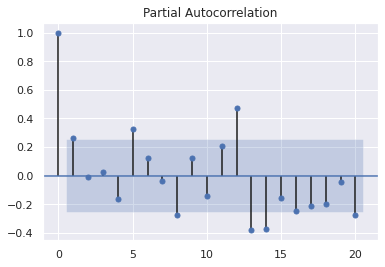

In [48]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dados_hanseniase_teste,lags=20)
plt.show()

In [49]:
pacf_model = sm.tsa.stattools.pacf(dados_hanseniase_teste,nlags=3)
pacf_model

array([ 1.        ,  0.26024522, -0.0119429 ,  0.02463687])

Depos colocamos nosso modelo para treinar

In [50]:
modelo = SARIMAX(dados_hanseniase_teste,order=(1, 0, 0), seasonal_order=(1, 0, 0,12))
modelo_treino = modelo.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [51]:
yhat = modelo_treino.predict(len(dados_hanseniase_teste),len(dados_hanseniase_teste) + 23)
yhat

2020-01-01    2419.392943
2020-02-01    2545.944304
2020-03-01    2196.335157
2020-04-01    2336.210020
2020-05-01    2330.715440
2020-06-01    2005.272567
2020-07-01    2182.999429
2020-08-01    2336.267024
2020-09-01    2295.074551
2020-10-01    2335.312178
2020-11-01    2049.651172
2020-12-01    1498.229086
2021-01-01    1837.860722
2021-02-01    1911.812262
2021-03-01    1674.752386
2021-04-01    1758.007595
2021-05-01    1746.501716
2021-06-01    1526.085725
2021-07-01    1634.903561
2021-08-01    1727.983221
2021-09-01    1694.169759
2021-10-01    1713.831337
2021-11-01    1520.648971
2021-12-01    1153.932671
Freq: MS, Name: predicted_mean, dtype: float64

Depois com a variável `yhat` fazemos a predição, na qual passo o tamanho do nosso dataframe como inicio e como fim passo o Array novamente  somado a 23, para nos mostrar os 12 meses de 2020 e 12 de 2021, ano que não foi mostrado em nossos dados, que só vão até 2019. Temos abaixo as datas, e os valores feitos pela regressão.

Transformo para dataframe, depois formato da forma a depois adicionar no dataframe com todos os anos. Renomeio as colunas e ponho como inteiro


In [52]:
 previsao_hanseniase = pd.DataFrame(yhat)
 previsao_hanseniase.reset_index(inplace=True)
 previsao_hanseniase.rename(columns={'index':"Data", "predicted_mean":"Casos"},inplace=True)


In [53]:
previsao_hanseniase["Casos"] = previsao_hanseniase["Casos"].astype(int)
previsao_hanseniase.set_index("Data",inplace=True)
previsao_hanseniase.head()

,Casos
Data,
2020-01-01,2419
2020-02-01,2545
2020-03-01,2196
2020-04-01,2336
2020-05-01,2330


Antes de Juntar as tabelas

In [54]:
dados_hanseniase_previsao = dados_hanseniase_teste
dados_hanseniase_previsao.head()

,Casos
Data,
2015-01-01,2729
2015-02-01,2969
2015-03-01,3476
2015-04-01,2930
2015-05-01,3017


Depois de juntar

In [55]:
dados_hanseniase_previsao = dados_hanseniase_previsao.append(previsao_hanseniase)
dados_hanseniase_previsao

,Casos
Data,
2015-01-01,2729
2015-02-01,2969
2015-03-01,3476
2015-04-01,2930
2015-05-01,3017
...,...
2021-08-01,1727
2021-09-01,1694
2021-10-01,1713


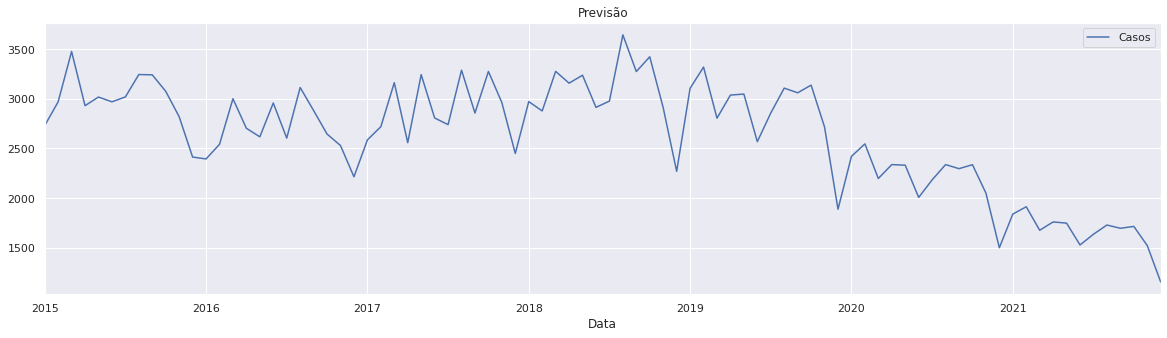

In [56]:
ax = dados_hanseniase_previsao.plot(figsize=(20,5))
plt.title("Previsão")
plt.show()

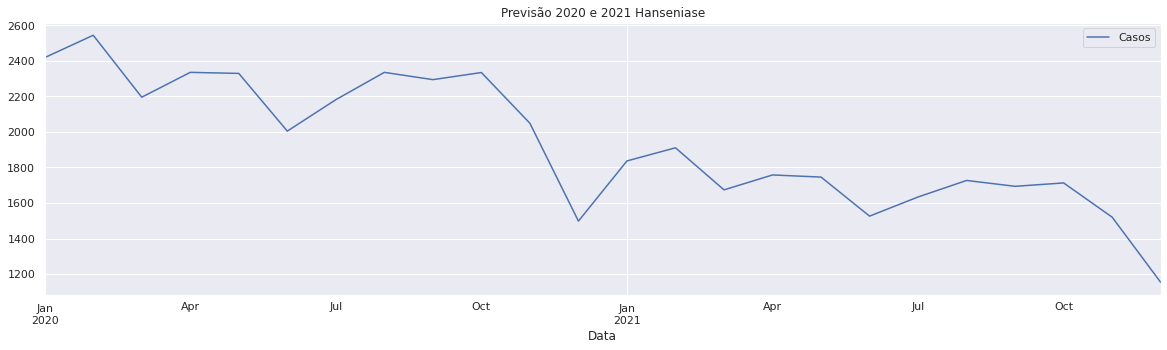

In [57]:
ax = dados_hanseniase_previsao.query("Data >=2020").plot(figsize=(20,5))
plt.title("Previsão 2020 e 2021 Hanseniase")
plt.show()

In [58]:
dados_hanseniase_previsao.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2015-01-01 to 2021-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Casos   84 non-null     int64
dtypes: int64(1)
memory usage: 1.3 KB


#Decomposição e Autorrelação

Tentando encontrar Padrões

Dando uma analisado no ano de 2001

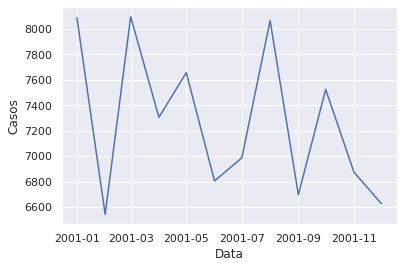

In [59]:
sns.lineplot(data=dados_st[:12],x="Data",y="Casos")

e 2002

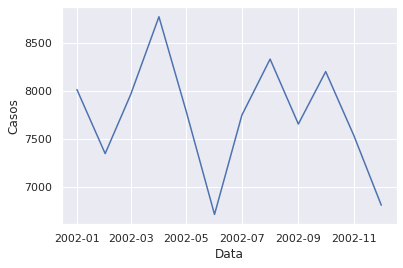

In [60]:
sns.lineplot(data=dados_st[12:24],x="Data",y="Casos")

e 2003

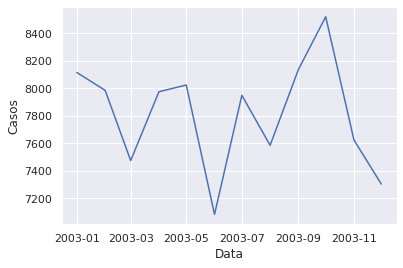

In [61]:
sns.lineplot(data=dados_st[24:36],x="Data",y="Casos")

Queremos plotar os gráficos juntos, entretanto não podemos simplesmente juntar um em cima do outro, pois, por estarem com anos distintos, o plot entenderá que devem ficar separados. Devemos analisar por mês cada um dos anos. Para isso, manipularemos as propriedades datetime que usamos para transformar strings em datas.

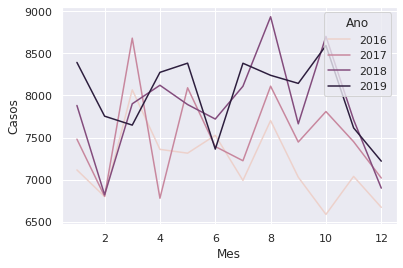

In [62]:
dados_st["Ano"]= dados_st["Data"].dt.year
dados_st["Mes"]= dados_st["Data"].dt.month

sns.lineplot(x = "Mes",y="Casos",data=dados_st.query("Ano >= 2016"),hue="Ano")

Vamos usar o statsmodel então para realizar analise de sazonalidade de forma mais aprofundada.

**Nota**: Irei importar novamente as bibliotecas para manter a coerência do que é explicado

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposicao_st = seasonal_decompose(dados_st[["Data","Casos"]].set_index("Data"))

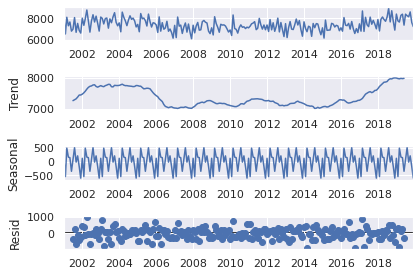

In [64]:
decomposicao_st.plot();

Podemos passar o modelo para multiplicativo, ficando melhor para este caso.

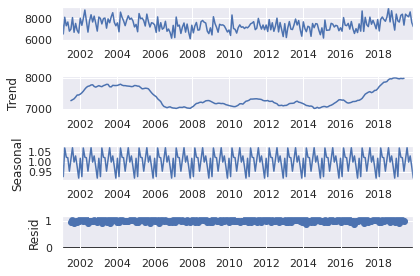

In [65]:
decomposicao_st = seasonal_decompose(dados_st[["Data","Casos"]].set_index("Data"),model="multiplicative")
decomposicao_st.plot();

Decomposição de Séries Temporais

In [66]:
url_passageiros = "https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/AirPassengers.csv"

In [67]:
dados_passageiros = pd.read_csv(url_passageiros)
dados_passageiros.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [68]:
dados_passageiros["Month"] = pd.to_datetime(dados_passageiros["Month"])
dados_passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


O que temos então nos nossos dados:

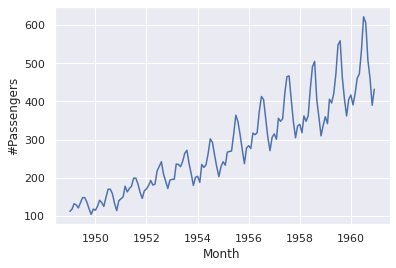

In [69]:
sns.lineplot(data=dados_passageiros,x="Month",y="#Passengers")

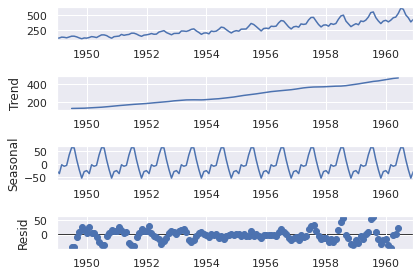

In [70]:
decomposicao_p = seasonal_decompose(dados_passageiros.set_index("Month"))
decomposicao_p.plot();

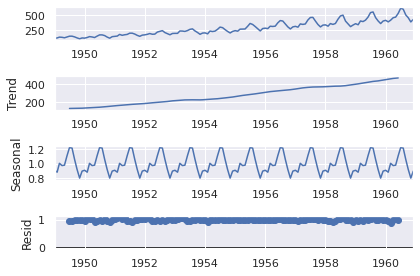

In [71]:
decomposicao_p_mult= seasonal_decompose(dados_passageiros.set_index("Month"),model="multiplicative")
decomposicao_p_mult.plot();

**OBSERVAÇÃO:** o porque do modelo aditivo não ser tão bom quanto o modelo multiplicativo no caso do dataset de passageiros.

<br>[link](https://medium.com/better-programming/a-visual-guide-to-time-series-decomposition-analysis-a1472bb9c930) <br>
No modelo de composição aditiva, assume padrões sazonais como periódicos. os padrões sazonais têm a mesma magnitude a cada ano e aumentam a tendência. No caso deste dataset isso não funciona pois o número de passgeiros cresceu e por isso, se olharmos no plot com passageiros e tendência+sazonalidade, percebemos que os valores estão distantes no início e não chegando ao final do plot. Neste caso, o melhor modelo é o Multiplicativo.

<img src="https://miro.medium.com/max/770/1*rZh7-NQ2HtoTaojRKU3OXw.png">

Autocorrelação e Autocorrelação Parcial

  Aqui, eu caio novamente nos estudos sobre ACF e PACF, que são as funções de AutoCorrelaçãõ e AutoCorrelação Parcial. Vou novamente importá-los, para não ficar perdido depois, quando revisar.

In [72]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

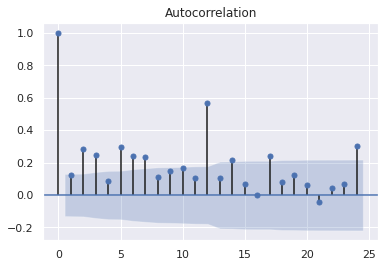

In [73]:
plot_acf(dados_st["Casos"]);

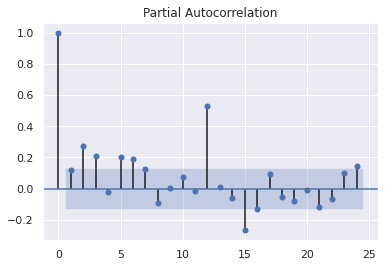

In [74]:
plot_pacf(dados_st["Casos"]);

E como fica no caso dos Passageiros no dataset anterior?

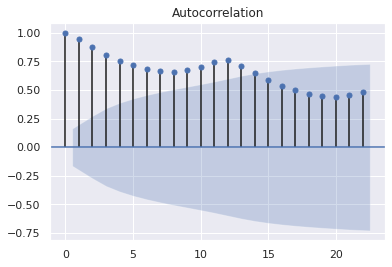

In [75]:
plot_acf(dados_passageiros["#Passengers"]);

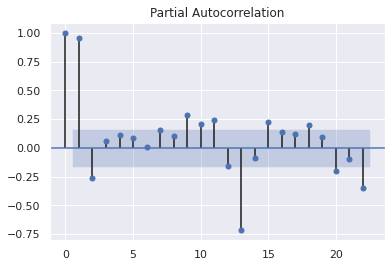

In [76]:
plot_pacf(dados_passageiros["#Passengers"]);

###📗 AULA 4 - DESAFIO 07 : Transformar as datas da base de dados em index e realizar os slices feitos em aulas pelas datas.

In [77]:
dados_st_desafio = dados_st[["Data","Casos"]]
dados_st_desafio = dados_st_desafio.set_index("Data")
dados_st_desafio.head(2)

,Casos
Data,
2001-01-01,8088
2001-02-01,6542


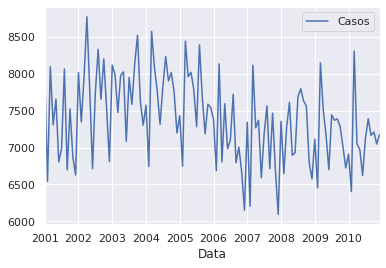

In [78]:
dados_st_desafio.query("Data > 2000 and Data < 2011").plot()
plt.show()

###📗 AULA 4 - DESAFIO 08 :  Formatar os gráficos de decomposição, colocar título e modificar os tamanhos. realizar a decomposição de outras séries temporais como a da Hanseníase.

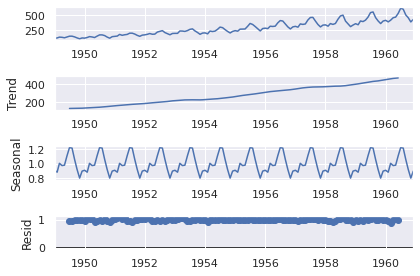

In [79]:
decomposicao_p_desafio = seasonal_decompose(dados_passageiros.set_index("Month"),model="multiplicative")
decomposicao_p_desafio.plot();

###📗 AULA 4 - DESAFIO 09 :  Realizar uma análise de autocorrelação e autocorrelação parcial nos dados da COVID-19, interpretar e discutir no discord.

#Previsões em Séries Temporais

Reforçando conceitos